# Data Science, Prediction, and Forecasting - Assignment 3

## Finding $\pi$ without doing any integrals

The area of a circle with radius $r$ is $r^2 \pi$. Therefore the area of the unit circle (i.e., the circle with radius 1) is $\pi$. The function for the positive arc of the unit circle is

$$f^+(x) = \sqrt{1 - x^2} \quad \text{for } x \in [-1, 1].$$

This means that

$$\int_{-1}^{1} \sqrt{1 - x^2} \mathrm{d}x = \frac{\pi}{2}.$$

So solving this integral allows us to determine $\pi$. However, that's hard and tedious. Fortunately, there is a way to approximate $\pi$ to arbitrary precision using Monte Carlo sampling. In order to do that, we randomly sample an $x$ and a $y$ from the interval $[-1, 1]$. We then interpret these as coordinates in the $x,y$ plane. The area of the square we sampled from is 4. The unit circle (with area $\pi$) fits exactly into this square.

1. Explain how one can numerically approximate $\pi$ by calculating the proportion of random samples which lie inside the unit circle.

$$\frac{\text{Area of unit circle}}{\text{Area of sampling region}} = \frac{\pi}{4} \approx \frac{\text{Number of }(x, y)\text{-Samples with }\sqrt{x^2+y^2} \leq 1}{\text{Total number of samples}}.$$

Therefore

$$\pi \approx 4 \cdot \frac{\text{Number of }(x, y)\text{-Samples with }\sqrt{x^2+y^2} \leq 1}{\text{Total number of samples}}.$$



2. Write a Python program which does exactly that.

In [1]:
import numpy as np

In [2]:
def estimate_pi(n):
    """Estimate pi using n samples."""
    # Sample x's and y's
    x = np.random.uniform(-1, 1, n)
    y = np.random.uniform(-1, 1, n)

    # Determine the number of points inside the circle
    inside = np.sum(x**2 + y**2 <= 1)

    # Estimate pi
    pi = 4 * inside / n

    return pi

In [3]:
estimate_pi(10)


3.2

In [4]:
estimate_pi(100)

2.92

In [5]:
estimate_pi(int(1e4))

3.164

In [6]:
estimate_pi(int(1e8))

3.1415738

3. Create a graph of how your approximation evolves in the course of sampling.

In [7]:
def estimate_pi_history(n):
    """Estimate pi using n samples and keep track of the history of estimates."""
    # Sample x's and y's
    x = np.random.uniform(-1, 1, n)
    y = np.random.uniform(-1, 1, n)

    # Cumulative sum of the number of points inside the circle
    inside = np.cumsum(x**2 + y**2 <= 1)    

    # Evolution of pi estimates
    pi_history = 4 * inside / np.arange(1, n+1)

    return pi_history

In [8]:
# Create a history of pi estimates
pi_history = estimate_pi_history(5000)

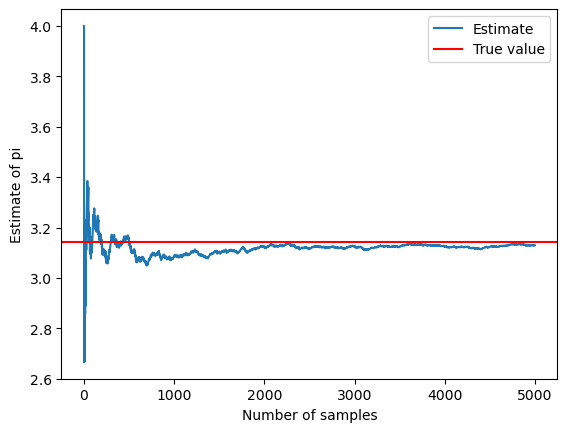

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the history of pi estimates
plt.plot(pi_history)
# Horizontal line at the true value of pi
plt.axhline(np.pi, color='r')
# Labels and legend
plt.xlabel('Number of samples')
plt.ylabel('Estimate of pi')
plt.legend(['Estimate', 'True value'])
plt.show()